## Another Fundamental Topic in FE is the Markowitz' Mean-Variance Efficient Portfolio. This script calculates the expected return & variance of a 3-asset portfolio and locates the optiomal portfolio - the MVE portfolio.

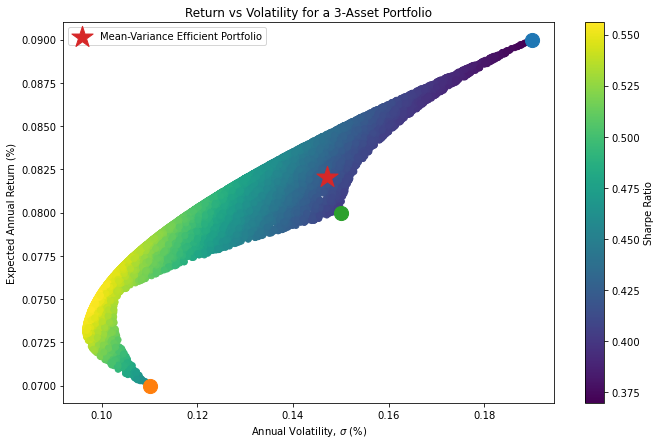

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the expected returns and volatilities for the three assets
returns = np.array([0.09, 0.07, 0.08])
volatilities = np.array([0.19, 0.11, 0.15])
n_assets = len(returns)

# Define the correlation matrix
correlations = np.array([[1.0, 0.2, 0.8],
                        [0.2, 1.0, 0.2],
                        [0.8, 0.2, 1.0]])

# Calculate the covariance from correlations & individual vols.
covariance_matrix = np.outer(volatilities, volatilities) * correlations
rf = 0.02

# Define Portfolios to be calculated
n_portfolios = 10000

# Generate random weights for each portfolio composition
weights = np.random.dirichlet(np.ones(n_assets), n_portfolios)

## Allow for Negative Weights
## Subtract 0.5 from each weight and multiply by 2 to allow for negative values
#weights = (weights - 0.5) * 2
## Ensure that each weight sum up to 1
#weights = weights / weights.sum(axis=1, keepdims=True)


# Calculate the expected return and volatility for each portfolio composition
portfolio_returns = np.dot(weights, returns)
portfolio_volatilities = np.sqrt(np.sum((weights @ covariance_matrix) * weights, axis=1))

# Begin Optimization Problem
sharpe_ratios = (portfolio_returns - rf)/ portfolio_volatilities

# Obtain Portfolio with Max Sharpe Ratio
max_SR_index = np.argmax(sharpe_ratios)
max_SR_return = portfolio_returns[max_sharpe_ratio_index]
max_SR_vol = portfolio_volatilities[max_sharpe_ratio_index]

# All Portfolios
plt.figure(figsize=(11, 7))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annual Volatility, $\sigma$ (%)')
plt.ylabel('Expected Annual Return (%)')
plt.title('Return vs Volatility for a 3-Asset Portfolio')

# The 3 Individual Assets
for i in range(n_assets):
    plt.scatter(volatilities[i], returns[i], marker='o', s=200)

# MVE Portfolio
plt.scatter(max_SR_vol, max_SR_return, marker='*', s=500,
            label='Mean-Variance Efficient Portfolio')
plt.legend()
plt.show()
